In [1]:
# AAPL TSLA NFLX MSFT NVDA
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#From csv, get stocks and dates
import csv
with open('tickers.csv') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        if row[0] == 'ï»¿stocks:':
            ticker = row
            del ticker[0]
        
print(ticker)

['AAPL', 'NVDA', 'TSLA', 'AMZN', 'GOOG']


In [3]:
# Pulling Data
data = []
for i in range(len(ticker)):
    data.append(
        pdr.get_data_tiingo(ticker[i], api_key='bf2663618907db14116db19a8108c44b96a1a37d',
                                start='2015-01-01', end='2020-01-01'))

In [4]:
# Cleaning Data
data1 = []
for df in data:
    df.reset_index(inplace=True)
    df.index = pd.to_datetime(df['date'])
    data1.append(df['adjClose'])

In [5]:
# Combining our adjClose prices
stocks = pd.concat(data1, axis=1)
stocks.columns = ticker
stocks

,AAPL,NVDA,TSLA,AMZN,GOOG
date,,,,,
2015-01-02 00:00:00+00:00,99.941997,19.389508,219.310,308.52,524.81
2015-01-05 00:00:00+00:00,97.126472,19.062015,210.090,302.19,513.87
2015-01-06 00:00:00+00:00,97.135613,18.484087,211.280,295.29,501.96
2015-01-07 00:00:00+00:00,98.497669,18.431110,210.950,298.42,501.10
2015-01-08 00:00:00+00:00,102.282173,19.129440,210.615,300.46,502.68
...,...,...,...,...,...
2019-12-24 00:00:00+00:00,282.839838,238.360191,425.250,1789.21,1343.56
2019-12-26 00:00:00+00:00,288.451463,238.929571,430.940,1868.77,1360.40
2019-12-27 00:00:00+00:00,288.342016,236.612097,430.380,1869.80,1351.89


In [6]:
# Log returns and covariance needed for the Sharpe Ratio 
log_returns = np.log(stocks/stocks.shift(1))
log_returns.dropna(inplace=True)


log_returns.cov() * 252

,AAPL,NVDA,TSLA,AMZN,GOOG
AAPL,0.061887,0.045966,0.033326,0.035838,0.031166
NVDA,0.045966,0.178919,0.053629,0.050436,0.042803
TSLA,0.033326,0.053629,0.201087,0.041150,0.031236
AMZN,0.035838,0.050436,0.041150,0.083985,0.044736
GOOG,0.031166,0.042803,0.031236,0.044736,0.056829


In [7]:
# Generating a random set of normalised weights
weights = np.array(np.random.random(5))
weights = weights/np.sum(weights)
weights

array([0.22962052, 0.11103341, 0.07733988, 0.26838394, 0.31362225])

In [8]:
# Variable that determines number of random portfolios to generate
num_portfolios = 10000

In [9]:
# Defining the arrays to "store" all our random portfolio and their statistics in its ith position
weights_array = np.zeros((num_portfolios, len(stocks.columns)))
returns_array = np.zeros(num_portfolios)
vol_array = np.zeros(num_portfolios)
sharpe_array = np.zeros(num_portfolios)

In [10]:
for i in range(num_portfolios):
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    #Storing the portfolio weights/returns/vol/sharpe ratio in the ith position
    weights = weights_array[i,:] = weights
    
    returns_array[i] = np.sum(log_returns.mean()*252*weights)
    
    vol_array[i] = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
    
    sharpe_array[i] = returns_array[i]/vol_array[i]

In [11]:
sharpe_array.max() # Our maximum Sharpe Ratio amongst the random portfolios

1.4343734404763584

In [12]:
sharpe_array.argmax() # Index position wihtin sharpe_array of the maximum Sharpe Ratio

6543

In [13]:
weights_array[sharpe_array.argmax()] # The weightings for the 5 stocks of this maximum Sharpe Ratio portfolio

array([0.15053449, 0.2853559 , 0.00712127, 0.55414232, 0.00284602])

In [14]:
# Plotting our portfolios on a return-volatility plot
#plt.scatter(vol_array,returns_array,c=sharpe_array,cmap='coolwarm')
#plt.colorbar(label='Sharpe Ratio')
#plt.xlabel = 'volatility'
#plt.ylabel = 'returns'

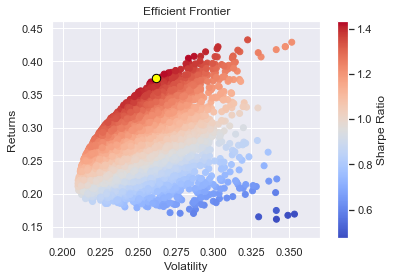

In [28]:
# Plotting our portfolios but with the best portfolio as a unique point
import seaborn as sns
sns.set()

max_SR_return = returns_array[sharpe_array.argmax()]
max_SR_vol = vol_array[sharpe_array.argmax()]

plt.scatter(vol_array,returns_array,c=sharpe_array,cmap='coolwarm')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_SR_vol, max_SR_return,c='yellow',edgecolors='black',s=70)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.savefig('Outputs/Efficient_Frontier.png')

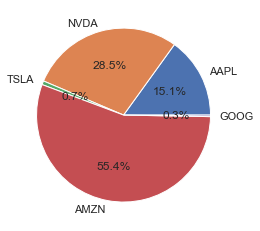

In [34]:
sns.set()
plt.pie(weights_array[sharpe_array.argmax()], labels = ticker, autopct='%1.1f%%')
plt.savefig('Outputs/Portfolio_share.png')